In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BigMartSales').getOrCreate()

In [3]:
train_df = spark.read.csv("BigMartSales_Data/Train_UWu5bXk.csv", header=True, inferSchema=True)
test_df = spark.read.csv("BigMartSales_Data/Test_u94Q5KV.csv", header=True, inferSchema=True)

In [5]:
train_df.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Item_Visibility: double (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)



In [6]:
train_df.columns

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [7]:
train_df.describe().show()

+-------+---------------+------------------+----------------+-------------------+-------------+-----------------+-----------------+-------------------------+-----------+--------------------+-----------------+------------------+
|summary|Item_Identifier|       Item_Weight|Item_Fat_Content|    Item_Visibility|    Item_Type|         Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type| Item_Outlet_Sales|
+-------+---------------+------------------+----------------+-------------------+-------------+-----------------+-----------------+-------------------------+-----------+--------------------+-----------------+------------------+
|  count|           8523|              7060|            8523|               8523|         8523|             8523|             8523|                     8523|       6113|                8523|             8523|              8523|
|   mean|           null|12.857645184136183|            null|0.06613202877895127|       

In [8]:
#Convert to Pandas Dataframe for EDA and Visualization
df = train_df.toPandas()

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


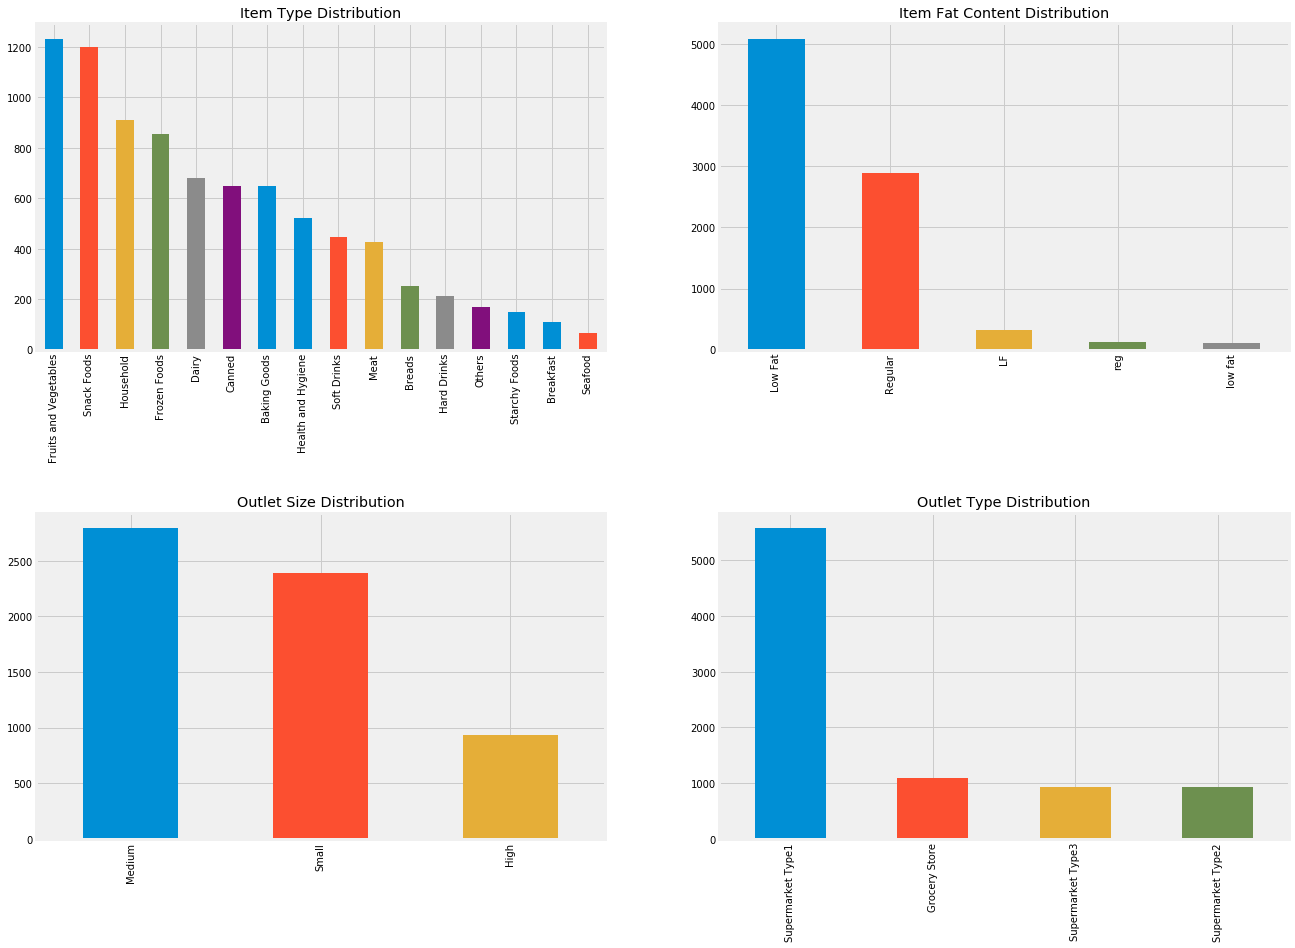

In [10]:
#Visualizing distribution of categorical variables
f,ax=plt.subplots(2,2,figsize=(20,15))
df['Item_Type'].value_counts().plot.bar(ax=ax[0,0])
ax[0,0].set_title('Item Type Distribution')
df['Item_Fat_Content'].value_counts().plot.bar(ax=ax[0,1])
ax[0,1].set_title('Item Fat Content Distribution')
df['Outlet_Size'].value_counts().plot.bar(ax=ax[1,0])
ax[1,0].set_title('Outlet Size Distribution')
df['Outlet_Type'].value_counts().plot.bar(ax=ax[1,1])
ax[1,1].set_title('Outlet Type Distribution')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

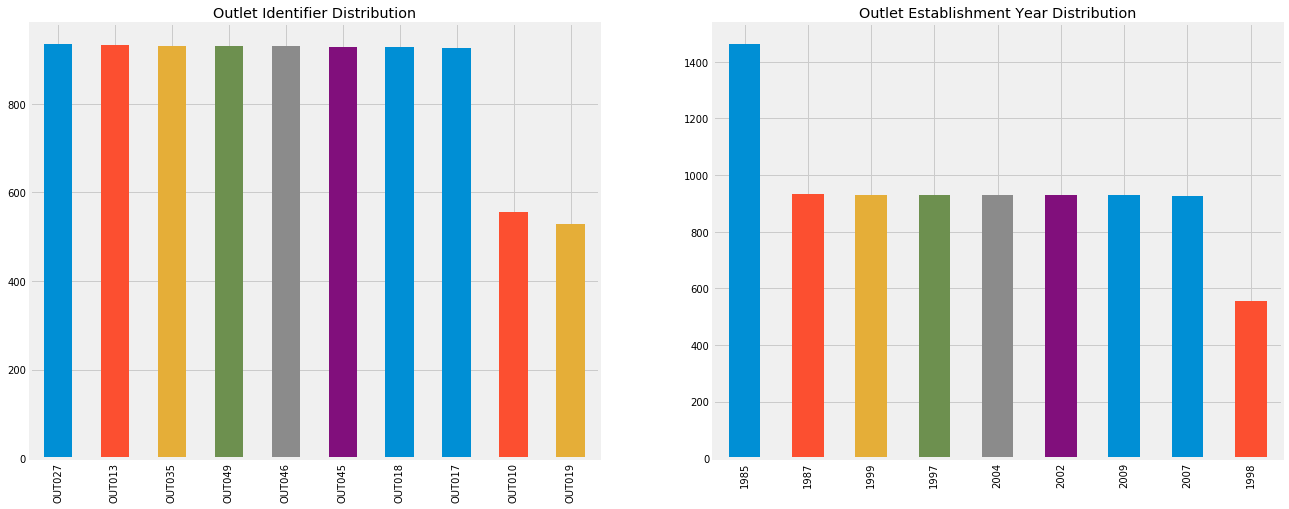

In [11]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Outlet_Identifier'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Outlet Identifier Distribution')
df['Outlet_Establishment_Year'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Outlet Establishment Year Distribution')
plt.show()

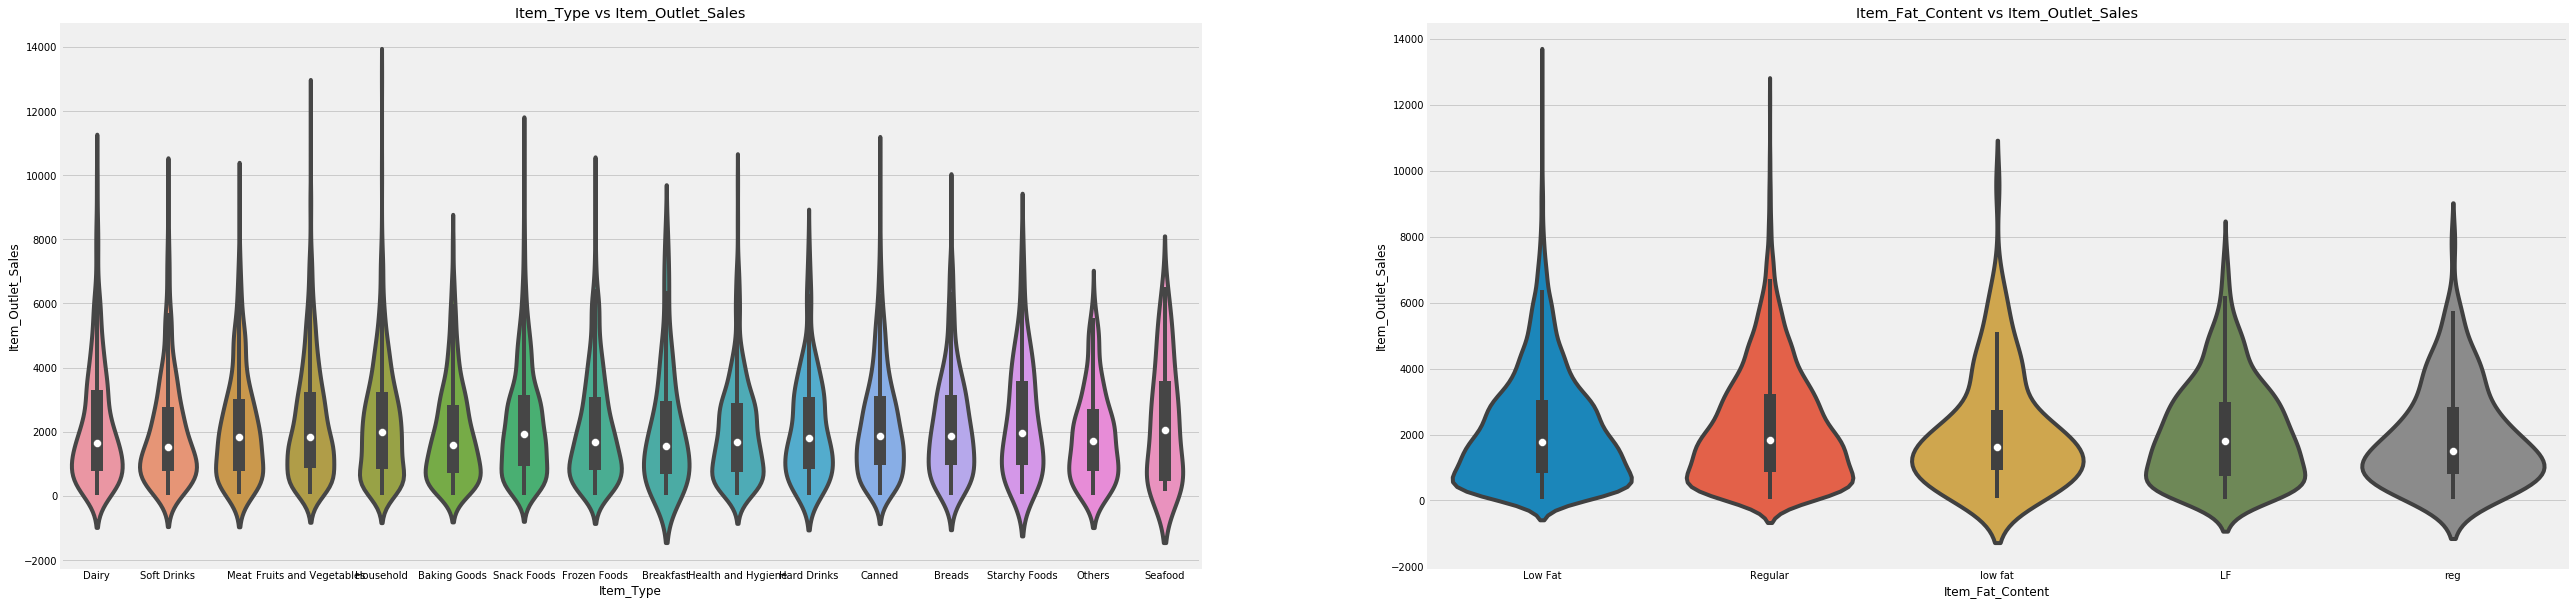

In [12]:
#Bivariate Analysis for categorical variables
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(40,10))
sns.violinplot('Item_Type','Item_Outlet_Sales',data=df,ax=ax[0])
ax[0].set_title('Item_Type vs Item_Outlet_Sales')
sns.violinplot('Item_Fat_Content','Item_Outlet_Sales',data=df,ax=ax[1])
ax[1].set_title('Item_Fat_Content vs Item_Outlet_Sales')
plt.close(2)
plt.show()

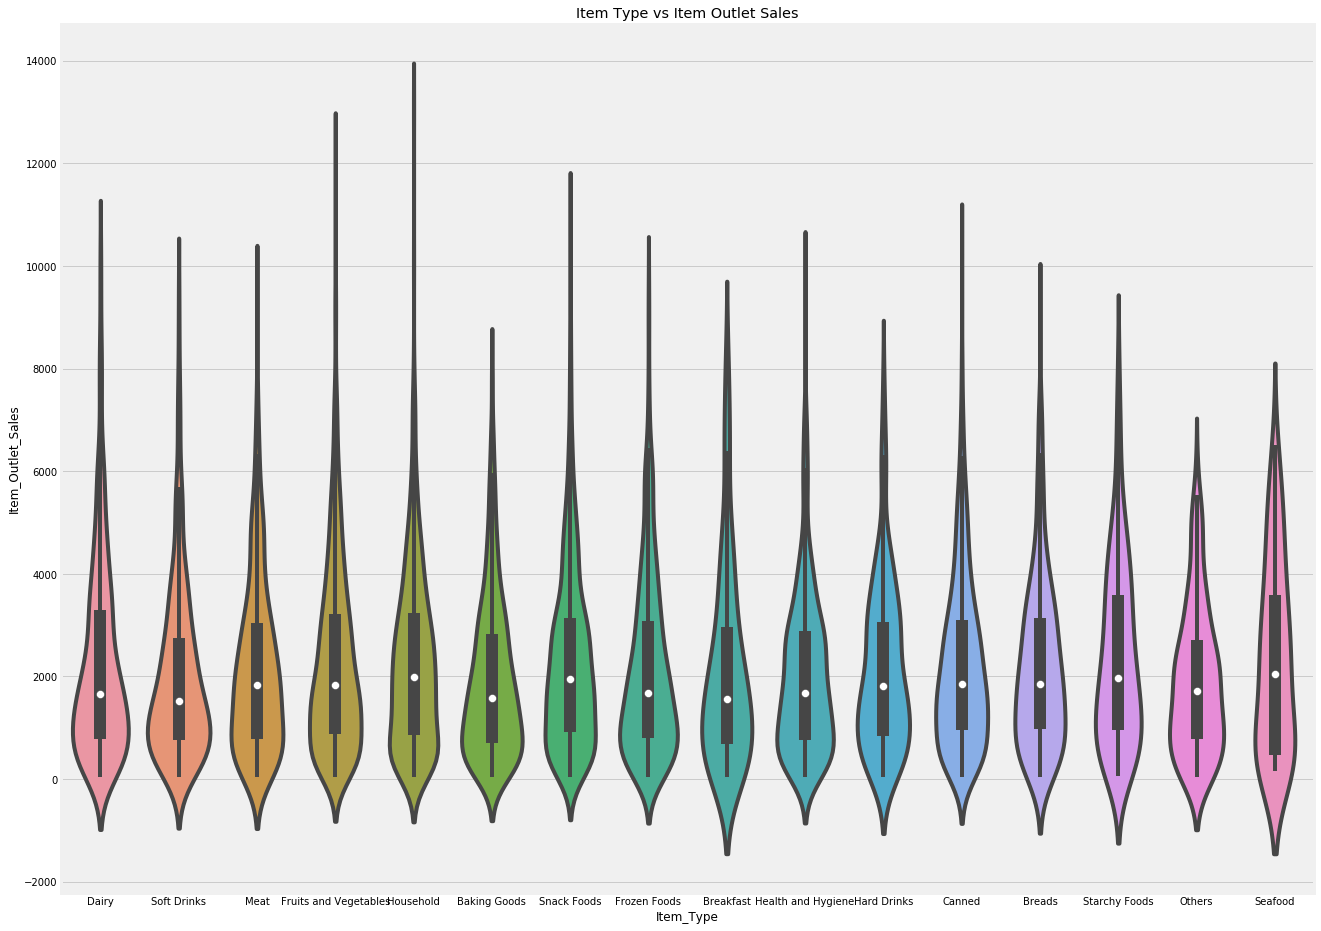

In [13]:
f, ax = plt.subplots(figsize=(20,16))
sns.violinplot('Item_Type','Item_Outlet_Sales',data=df)
ax.set_title('Item Type vs Item Outlet Sales')
plt.show()

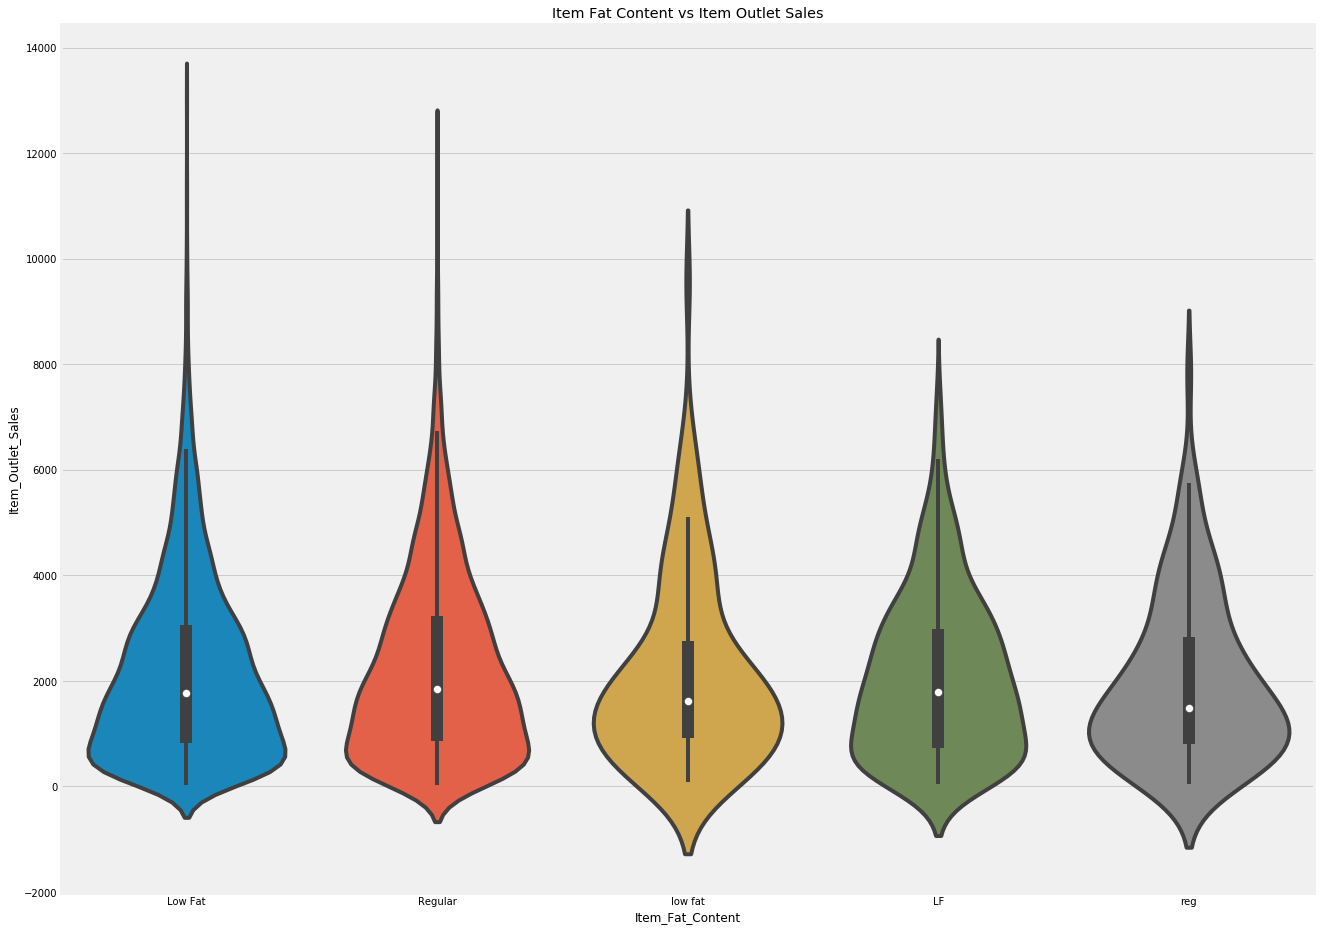

In [14]:
f, ax = plt.subplots(figsize=(20,16))
sns.violinplot('Item_Fat_Content','Item_Outlet_Sales',data=df)
ax.set_title('Item Fat Content vs Item Outlet Sales')
plt.show()

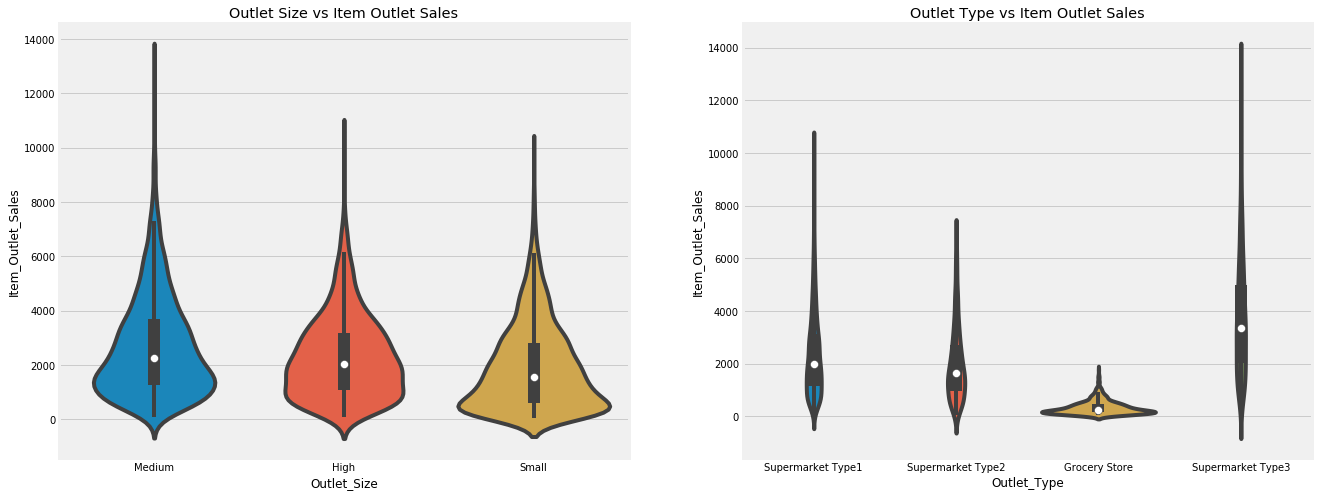

In [15]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.violinplot('Outlet_Size','Item_Outlet_Sales',data=df, ax=ax[0])
ax[0].set_title('Outlet Size vs Item Outlet Sales')
sns.violinplot('Outlet_Type','Item_Outlet_Sales',data=df, ax=ax[1])
ax[1].set_title('Outlet Type vs Item Outlet Sales')
plt.close(2)
plt.show()

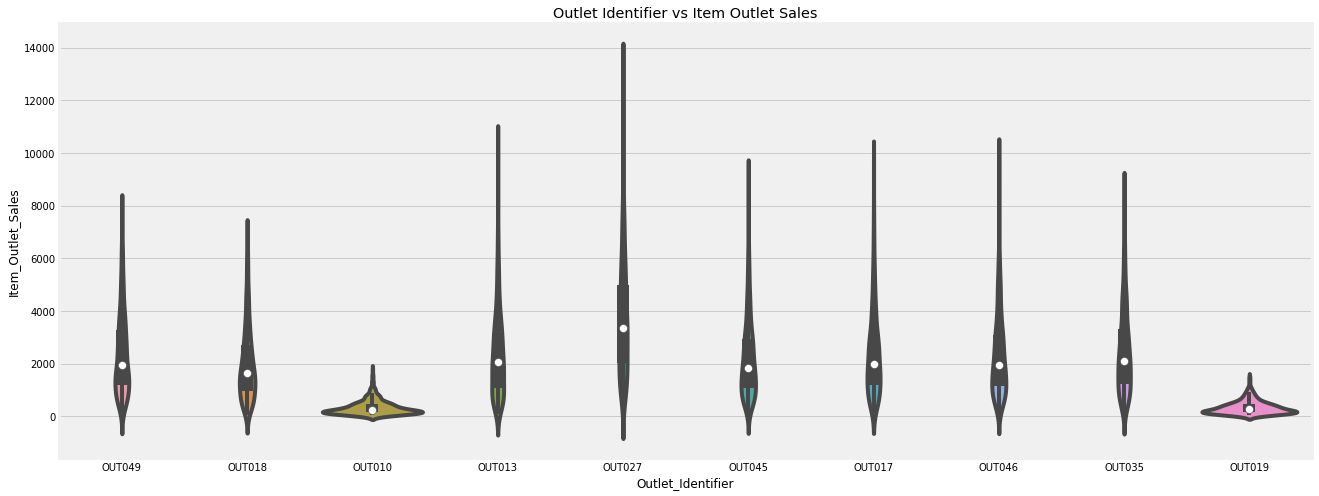

In [16]:
f, ax = plt.subplots(figsize=(20,8))
sns.violinplot('Outlet_Identifier','Item_Outlet_Sales',data=df)
ax.set_title('Outlet Identifier vs Item Outlet Sales')
plt.show()

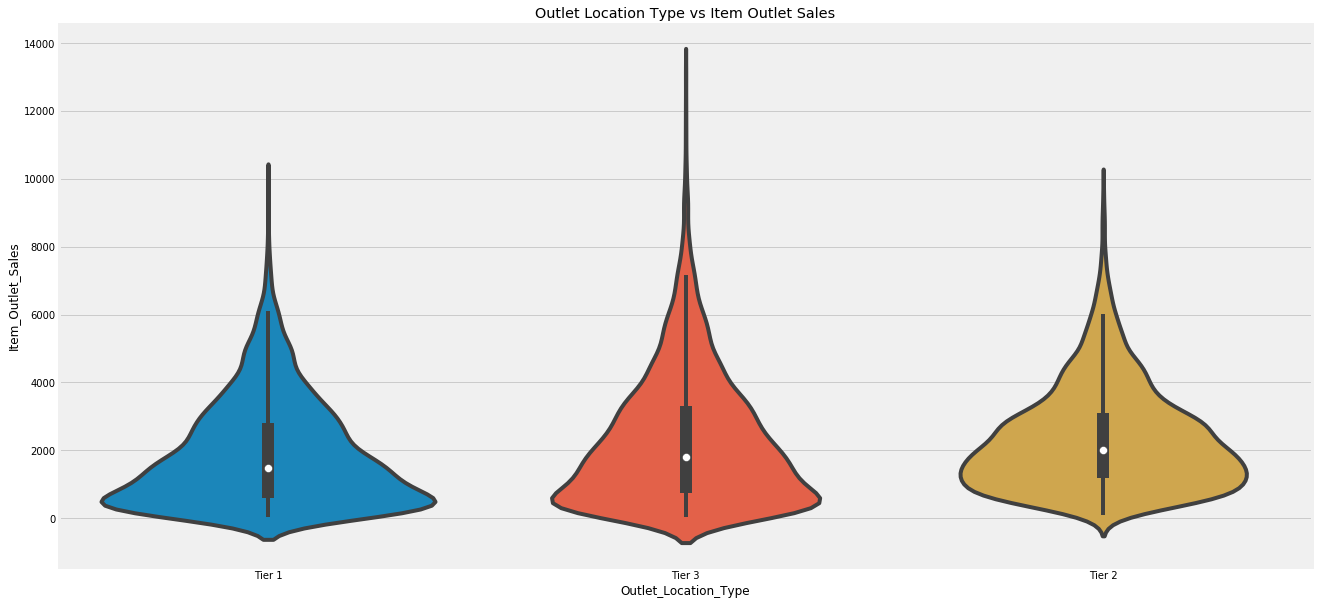

In [17]:
f, ax = plt.subplots(figsize=(20,10))
sns.violinplot('Outlet_Location_Type','Item_Outlet_Sales',data=df)
ax.set_title('Outlet Location Type vs Item Outlet Sales')
plt.show()

In [26]:
#Adding Item_Outlet_Sales column in test dataframe for merging
from pyspark.sql.types import *
from pyspark.sql.functions import lit
test_df_new = test_df.withColumn("Item_Outlet_Sales",lit(None).cast(NullType()))
test_df_new.columns

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [27]:
comb_df = train_df.union(test_df_new)

In [28]:
comb_df.describe().show()

+-------+---------------+-----------------+----------------+-------------------+-------------+------------------+-----------------+-------------------------+-----------+--------------------+-----------------+------------------+
|summary|Item_Identifier|      Item_Weight|Item_Fat_Content|    Item_Visibility|    Item_Type|          Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type| Item_Outlet_Sales|
+-------+---------------+-----------------+----------------+-------------------+-------------+------------------+-----------------+-------------------------+-----------+--------------------+-----------------+------------------+
|  count|          14204|            11765|           14204|              14204|        14204|             14204|            14204|                    14204|      10188|               14204|            14204|              8523|
|   mean|           null| 12.7928542286443|            null| 0.0659527800739933|        

In [31]:
#Find columns havin missing values in them
for column in comb_df.columns:
    print (column,comb_df.filter(comb_df[column].isNull()).count())

Item_Identifier 0
Item_Weight 2439
Item_Fat_Content 0
Item_Visibility 0
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Establishment_Year 0
Outlet_Size 4016
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 5681


In [29]:
#Handling missing values using Panda Dataframe
comb_df_pandas = comb_df.toPandas()

In [30]:
comb_df_pandas.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
#Calculate the mean_weight based on Item_Identifier to fill in the missing values
from pyspark.sql.functions import format_number,avg
mean_weight_dict = {}
for row in comb_df.filter(comb_df['Item_Weight'].isNull()).collect():
    #print (row.Item_Type)
    mean_Item_Weight = comb_df.filter(comb_df['Item_Identifier'] == row.Item_Identifier).select(format_number(avg('Item_Weight'),2).alias('Mean_Weight')).collect()
    #row['Item_Weight']
    #mean_weight_dict[row.Item_Identifier] = float(mean_Item_Weight[0][0])
    if mean_Item_Weight[0][0] != None:
        mean_weight_dict[row.Item_Identifier] = float(mean_Item_Weight[0][0])
        #train_df.filter(train_df['Item_Identifier'] == row.Item_Identifier).na.fill(float(mean_Item_Weight[0][0]),['Item_Weight'])
        print(mean_Item_Weight[0][0],row.Item_Identifier)

19.00 FDP10
8.26 DRI11
8.31 FDW12
15.50 FDC37
14.50 FDC14
20.20 FDV20
6.38 FDX10
15.25 FDB34
10.20 FDS02
5.94 FDI26
6.21 FDF09
15.50 FDY40
17.50 FDY45
13.35 FDN48
18.85 NCL18
12.60 FDR12
20.20 FDQ49
7.93 FDU04
12.15 NCP18
20.60 FDD10
9.39 DRE60
6.69 FDW39
6.20 FDX34
12.00 FDY25
12.15 NCR53
18.25 FDH35
9.50 DRK12
21.35 FDR07
14.60 NCB30
9.39 DRY23
14.00 FDQ28
10.00 NCO17
6.21 FDT12
11.10 FDO08
17.60 NCX06
15.60 FDE40
4.62 FDX49
10.30 FDI24
5.17 FDS45
9.06 NCO07
8.93 DRF27
16.70 FDX25
6.36 NCX42
5.37 FDG33
9.30 DRM47
17.60 FDS46
7.05 FDX21
11.80 NCU05
18.35 DRF15
6.40 FDQ04
19.35 FDH19
17.85 FDZ10
9.00 NCF07
11.10 FDJ08
10.70 FDM25
20.20 FDV60
17.35 FDV13
20.20 FDV20
13.00 FDM50
5.98 FDY31
9.30 DRQ35
18.00 NCW17
15.10 FDN60
13.80 FDN58
15.60 FDC41
21.10 FDO01
17.20 FDY49
18.75 FDJ22
19.35 FDN39
8.98 FDJ56
17.70 FDX26
15.10 FDZ07
18.35 NCW53
20.35 FDX31
18.20 FDR43
14.65 FDP22
13.35 FDU02
10.89 NCK31
15.60 FDU45
6.80 FDW24
18.85 DRP35
10.60 FDW35
5.76 FDW23
17.25 DRH03
5.86 FDW27
8.89 FDS

8.30 FDB49
18.70 FDR08
16.00 FDQ51
10.39 FDH21
16.75 FDY55
18.70 FDP33
5.32 NCU17
20.20 NCG30
7.56 NCR29
4.55 FDP40
17.70 FDE11
6.99 FDO39
19.85 FDG32
5.75 FDU50
15.35 FDP46
10.65 FDC20
7.33 FDI56
9.80 NCR17
15.20 FDT57
19.35 DRA24
20.10 NCK05
11.65 FDS43
8.10 FDZ37
10.60 FDO49
7.87 FDO13
6.88 FDS25
7.72 NCQ30
16.00 FDL34
7.55 FDA07
16.85 FDZ16
14.15 FDN09
14.50 DRG03
15.60 FDC44
9.00 NCU42
11.00 FDV23
10.50 FDY34
6.59 NCZ30
11.50 FDN10
6.47 FDS13
15.10 FDY21
13.65 FDO10
16.25 FDA50
12.15 FDU23
11.10 FDQ40
13.15 FDB17
7.39 NCL31
18.75 NCQ50
5.16 FDB05
19.60 FDX04
8.32 FDQ20
6.03 DRI03
13.35 FDK34
18.00 FDW48
18.20 FDE08
12.30 NCH06
14.10 FDL56
6.58 FDN23
14.00 FDY48
10.50 FDT20
15.35 FDP04
5.70 FDQ11
8.42 NCH43
20.25 FDB14
9.20 FDK24
6.30 FDN33
5.26 FDT47
15.20 NCN29
17.35 NCF42
20.75 DRE49
9.60 FDW34
10.39 FDO03
5.79 FDQ31
16.20 FDD53
9.00 NCS29
6.63 FDL52
7.36 FDK04
13.35 DRE15
6.05 FDB08
5.40 NCT53
7.42 FDP21
6.63 NCJ43
18.00 NCW41
7.27 NCO05
7.97 FDF33
15.00 DRN59
13.15 FDN44
19.50

11.80 FDJ34
5.44 FDW60
9.20 FDV48
15.35 DRE25
18.25 FDY15
14.50 FDR59
10.39 FDO03
12.85 FDX08
16.85 FDZ16
14.15 FDT37
7.39 NCL31
6.78 FDR32
10.80 FDL08
20.60 FDB32
12.30 FDX46
20.70 FDD14
16.75 FDX45
10.70 FDD28
19.35 FDU20
16.70 FDF56
9.00 FDH41
17.75 FDS32
8.39 FDL10
12.35 FDT24
13.00 NCQ06
11.30 NCV06
20.35 FDX31
7.47 FDY28
17.50 FDN15
12.50 NCE43
19.00 NCX41
19.35 FDN45
11.00 FDK27
17.00 FDY37
14.00 FDA32
15.00 FDA01
9.30 FDX44
6.83 NCM05
17.70 NCQ54
11.39 NCQ05
20.70 DRH39
16.25 FDB09
8.30 FDD08
4.92 FDT48
12.85 FDX40
5.76 FDO28
7.85 FDG02
13.50 NCH54
7.37 FDX20
15.85 FDG59
9.50 FDQ45
12.85 NCS41
7.32 FDQ58
5.00 DRK37
17.25 DRG13
19.10 NCN14
12.15 FDU44
8.89 NCN18
13.60 FDY38
9.20 FDC48
17.75 NCC54
6.13 NCM42
15.35 NCL19
9.11 NCR42
10.50 FDU31
15.70 FDR03
9.00 FDS49
8.85 NCD43
8.37 FDV44
5.78 FDL58
6.38 NCY42
12.30 FDB35
15.50 FDC37
11.50 FDV21
15.75 DRP47
16.00 FDX02
19.70 FDQ16
7.39 DRB01
7.39 NCC43
7.72 FDX13
12.35 FDJ03
9.50 FDE28
18.35 DRL23
20.85 FDS60
6.04 FDZ36
13.30 FDT28

18.20 NCY17
5.78 FDL58
19.00 NCA30
5.51 NCH29
12.50 FDM02
10.30 FDJ14
20.70 FDL51
16.70 FDM12
8.64 NCI17
10.50 FDX38
19.85 NCZ41
6.45 FDX23
17.35 FDW16
17.35 FDR24
13.85 DRD24
6.98 FDK14
11.85 DRE27
8.38 FDS36
15.50 FDY40
7.29 FDS14
15.10 FDX55
13.10 FDC05
12.10 DRN47
20.85 FDU40
16.00 FDD04
13.00 NCD06
9.50 FDW44
6.21 FDT12
15.20 FDD56
17.60 DRH37
10.20 DRO47
15.70 FDQ24
19.00 NCC06
12.85 FDD11
12.10 FDE45
16.50 FDK60
10.00 FDV49
6.65 FDP32
20.35 NCN54
5.67 FDR57
15.70 FDC38
14.10 DRJ51
9.60 DRN37
5.82 NCJ30
5.19 FDF17
18.75 DRD27
13.10 FDZ15
13.65 FDZ03
20.10 FDW43
7.52 FDP48
5.79 FDS56
7.42 FDT21
11.60 DRA12
5.73 DRF48
13.80 DRC27
16.50 FDA25
5.63 FDW03
15.20 NCN29
13.15 NCH07
16.60 FDD02
6.42 FDH38
6.57 DRM11
11.50 FDX52
15.35 FDW15
19.70 FDR21
12.30 DRB25
5.63 FDV24
13.10 FDC05
14.15 FDE47
12.60 FDN16
14.00 FDA32
17.10 FDV47
10.10 NCV05
20.85 FDV58
18.85 FDN22
16.00 FDT56
16.60 FDK44
20.75 FDI09
4.63 FDS23
7.39 NCC43
10.39 FDP36
14.85 FDT13
18.20 FDI08
13.50 FDR19
17.75 FDZ48
20.8

In [33]:
for key,value in mean_weight_dict.items():
    comb_df_pandas.loc[(comb_df_pandas.Item_Weight.isnull())&(comb_df_pandas.Item_Identifier==key),'Item_Weight']=value

In [34]:
comb_df_pandas.Item_Weight.isnull().any()

False

In [35]:
#Handling Missing values for Outlet_Size by getting it based on the Outlet Identifier
outlet_size_dict = {}
for row in train_df.filter(train_df['Outlet_Size'].isNotNull()).collect():
    if row.Outlet_Identifier not in outlet_size_dict:
        outlet_size = train_df.filter(train_df['Outlet_Identifier'] == row.Outlet_Identifier).select('Outlet_Size').collect()
        print (outlet_size[0][0])
        outlet_size_dict[row.Outlet_Identifier] = outlet_size[0][0]

Medium
Medium
High
Medium
Small
Small
Small


In [36]:
for key,value in outlet_size_dict.items():
    comb_df_pandas.loc[(comb_df_pandas.Outlet_Size.isnull())&(comb_df_pandas.Outlet_Identifier==key),'Outlet_Size'] = value

In [38]:
comb_df_pandas.loc[(comb_df_pandas.Outlet_Size.isnull()),'Outlet_Size'] = 'NA'


In [116]:
comb_df_pandas.Outlet_Size.isnull().any()

False

In [43]:
#Handling Null values for Item_Visibility by getting it based on the Item_Identifier
item_vis_dict = {}
for row in comb_df.filter(train_df['Item_Visibility'] == 0.0).collect():
    if row.Item_Identifier not in item_vis_dict:
        Mean_Item_Visibility = comb_df.filter(comb_df['Item_Identifier'] == row.Item_Identifier).select(format_number(avg('Item_Visibility'),2).alias('Mean_Item_Visibility')).collect()
        print (row.Item_Identifier, Mean_Item_Visibility[0][0])
        item_vis_dict[row.Item_Identifier] = Mean_Item_Visibility[0][0]

FDX07 0.02
NCD19 0.01
FDP36 0.06
FDY07 0.04
FDP33 0.09
FDO23 0.14
NCP05 0.02
FDM20 0.04
FDH35 0.06
FDV25 0.04
FDG12 0.00
FDV11 0.08
FDI16 0.14
FDB36 0.03
FDR47 0.09
FDL58 0.08
NCZ54 0.08
FDR44 0.09
FDA39 0.01
FDS49 0.08
FDR04 0.02
FDX25 0.08
FDZ07 0.09
FDY28 0.12
FDC50 0.14
FDP22 0.09
NCZ42 0.01
FDA27 0.03
DRH15 0.11
FDU56 0.03
FDM24 0.08
FDW28 0.09
NCG42 0.04
NCK54 0.02
FDK24 0.09
FDL52 0.05
FDK44 0.12
FDB38 0.02
FDS32 0.03
DRB48 0.02
FDU04 0.00
FDK48 0.03
FDN27 0.03
FDX46 0.06
FDY59 0.03
FDE05 0.03
NCQ05 0.02
FDU32 0.02
FDZ28 0.05
FDA10 0.14
FDY02 0.09
FDA03 0.04
FDO10 0.01
FDW49 0.09
FDR23 0.09
FDA47 0.11
FDS31 0.03
FDQ31 0.06
FDV01 0.08
FDZ12 0.10
DRK12 0.04
FDG45 0.09
FDV07 0.02
NCO17 0.06
DRG27 0.10
FDK60 0.08
FDC44 0.17
FDB21 0.14
NCO43 0.05
NCX41 0.02
NCD07 0.04
FDD09 0.02
DRH59 0.06
FDR48 0.12
DRA12 0.03
DRG11 0.08
FDZ35 0.02
NCA42 0.02
FDF04 0.01
FDO50 0.07
FDN12 0.08
NCK29 0.10
FDM32 0.02
FDI41 0.06
FDN10 0.04
FDZ31 0.10
FDC39 0.12
FDZ20 0.04
FDW38 0.11
DRF37 0.07
FDZ50 0.08

In [44]:
for key,value in item_vis_dict.items():
    comb_df_pandas.loc[(comb_df_pandas.Item_Visibility == 0.0)&(comb_df_pandas.Item_Identifier==key),'Item_Visibility'] = value

In [46]:
comb_df_pandas.loc[comb_df_pandas.Item_Visibility == 0.0].count()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [48]:
comb_df_pandas.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility               object
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int32
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [127]:
#comb_df_pandas.Item_Outlet_Sales.isnull().any().any()
comb_df_pandas.loc[(comb_df_pandas.Item_Identifier == 'FDW58') & (comb_df_pandas.Item_Weight == 20.750) & (comb_df_pandas.Item_MRP == 107.8622)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.75,Low Fat,0.00756484,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN


In [49]:
#Define the schema for the DataFrame -- to avoid type conversion errors
from pyspark.sql.types import *
salesSchema = StructType([ StructField("Item_Identifier", StringType(), True)\
                       ,StructField("Item_Weight", DoubleType(), True)\
                       ,StructField("Item_Fat_Content", StringType(), True)\
                       ,StructField("Item_Visibility", StringType(), True)\
                       ,StructField("Item_Type", StringType(), True)\
                       ,StructField("Item_MRP", DoubleType(), True)\
                       ,StructField("Outlet_Identifier", StringType(), True)\
                       ,StructField("Outlet_Establishment_Year", IntegerType(), True)\
                       ,StructField("Outlet_Size", StringType(), True)\
                       ,StructField("Outlet_Location_Type", StringType(), True)\
                       ,StructField("Outlet_Type", StringType(), True)\
                       ,StructField("Item_Outlet_Sales", DoubleType(), True)])

In [50]:
#Now convert this Pandas DF to Spark DF
# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
new_comb_df = spark.createDataFrame(comb_df_pandas,schema=salesSchema) 

In [51]:
type(new_comb_df)

pyspark.sql.dataframe.DataFrame

In [52]:
new_comb_df.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Item_Visibility: string (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)



In [137]:
#new_comb_df.filter(new_comb_df['Item_Outlet_Sales'].isNull()).count()
new_comb_df.filter(isnan("Item_Outlet_Sales")).count()

5681

In [56]:
#RE-Check for null values in the new DataFrame - Only the test data will have Item_Outlet_Sales as NULL
from pyspark.sql.functions import *
new_comb_df.select([count(when(isnan(c) | isnull(c), c)).alias(c) for c in comb_df_pandas.columns]).show()

+---------------+-----------+----------------+---------------+---------+--------+-----------------+-------------------------+-----------+--------------------+-----------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+---------+--------+-----------------+-------------------------+-----------+--------------------+-----------+-----------------+
|              0|          0|               0|              0|        0|       0|                0|                        0|          0|                   0|          0|             5681|
+---------------+-----------+----------------+---------------+---------+--------+-----------------+-------------------------+-----------+--------------------+-----------+-----------------+



In [57]:
#Feature Engineering Section Starts
#For creating new categorical variable Item_Type_New
perishable = ['Breads', 'Breakfast', 'Dairy', 'Fruits and Vegetables', 'Meat', 'Seafood']
non_perishable = ['Baking Goods', 'Canned', 'Frozen Foods', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Soft Drinks']
def func_item_type_new(item_type):
    if item_type in perishable:
        return 'perishable'
    else:
        return 'non-perishable'

In [60]:
#User Defined Functions for creating new column - categorical value
from pyspark.sql.functions import udf
iplookup_udf = udf(func_item_type_new)
comb_df_1 = new_comb_df.withColumn("Item_Type_New_2", iplookup_udf(new_comb_df.Item_Type))

In [61]:
comb_df_1.filter(comb_df_1['Item_Type'] == 'Household').show()

+---------------+-----------+----------------+---------------+---------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+---------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|Item_Type_New_2|
+---------------+-----------+----------------+---------------+---------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+---------------+
|          NCD19|       8.93|         Low Fat|           0.01|Household| 53.8614|           OUT013|                     1987|       High|              Tier 3|Supermarket Type1|         994.7052| non-perishable|
|          NCB30|       14.6|         Low Fat|    0.025698134|Household|196.5084|           OUT035|                     2004|      Small|              Tier 

In [62]:
#DR -> Drinks, FD -> Food, NC -> Non-Consumable -- Creating a new feature for Item_Category based on Item_Identifier
from pyspark.sql.functions import substring
comb_df_2 = comb_df_1.withColumn("Item_Category", substring(comb_df_1.Item_Identifier,1,2))

In [63]:
#Checking whether new feature created properly or not
comb_df_2.filter(comb_df_1['Item_Identifier'] == 'NCH54').show()

+---------------+-----------+----------------+---------------+---------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+---------------+-------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|Item_Type_New_2|Item_Category|
+---------------+-----------+----------------+---------------+---------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+---------------+-------------+
|          NCH54|       13.5|         Low Fat|     0.07266912|Household| 160.292|           OUT046|                     1997|      Small|              Tier 1|Supermarket Type1|         1438.128| non-perishable|           NC|
|          NCH54|       13.5|         Low Fat|    0.072655379|Household| 157.792|           OUT035| 

In [64]:
#Setting NC item's Fat_Content value to non-edible
def fat_content(item_category,fat_content):
    if item_category == 'NC':
        return 'Non-Edible'
    else:
        return fat_content

fat_content_lookup_udf = udf(fat_content)
comb_df_3 = comb_df_2.withColumn("Item_Fat_Content_2", fat_content_lookup_udf(comb_df_2.Item_Category,comb_df_2.Item_Fat_Content)).drop("Item_Fat_Content")

In [65]:
comb_df_3.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Visibility: string (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)
 |-- Item_Type_New_2: string (nullable = true)
 |-- Item_Category: string (nullable = true)
 |-- Item_Fat_Content_2: string (nullable = true)



In [66]:
comb_df_4 = comb_df_3.withColumnRenamed("Item_Fat_Content_2", "Item_Fat_Content")

In [67]:
comb_df_4.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Visibility: string (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)
 |-- Item_Type_New_2: string (nullable = true)
 |-- Item_Category: string (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)



In [69]:
comb_df_5 = comb_df_4.withColumn("Outlet_Years", 2018 - comb_df_4.Outlet_Establishment_Year)

In [70]:
#checking new column
comb_df_5.filter(comb_df_4.Outlet_Establishment_Year == 1997).show()

+---------------+-----------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+---------------+-------------+----------------+------------+
|Item_Identifier|Item_Weight|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|Item_Type_New_2|Item_Category|Item_Fat_Content|Outlet_Years|
+---------------+-----------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+---------------+-------------+----------------+------------+
|          FDA03|       18.5|    0.045463773|               Dairy|144.1102|           OUT046|                     1997|      Small|              Tier 1|Supermarket Type1|         2187.153|     perishable|           FD|         Regular|          21|
|   

In [71]:
comb_df_6 = comb_df_5.withColumn("price_per_unit_wt", format_number(comb_df_4.Item_MRP/comb_df_4.Item_Weight,2))

In [72]:
def item_mrp_clusters(item_mrp):
    if item_mrp < 69:
        return "1st"
    elif item_mrp >= 69 and item_mrp < 136:
        return "2nd"
    elif item_mrp >= 136 and item_mrp < 203:
        return "3rd"
    else:
        return "4th"
    
item_mrp_group_udf = udf(item_mrp_clusters)
comb_df_7 = comb_df_6.withColumn("Item_MRP_clusters",item_mrp_group_udf(comb_df_6.Item_MRP))

In [73]:
comb_df_7.head(1)

[Row(Item_Identifier='FDA15', Item_Weight=9.3, Item_Visibility='0.016047301', Item_Type='Dairy', Item_MRP=249.8092, Outlet_Identifier='OUT049', Outlet_Establishment_Year=1999, Outlet_Size='Medium', Outlet_Location_Type='Tier 1', Outlet_Type='Supermarket Type1', Item_Outlet_Sales=3735.138, Item_Type_New_2='perishable', Item_Category='FD', Item_Fat_Content='Low Fat', Outlet_Years=19, price_per_unit_wt='26.86', Item_MRP_clusters='4th')]

In [74]:
#Encoding Categorical Varaibles
#Label Encoding for ordinal variable - Outlet_Size
def categorical_convert_Outlet_Size(Outlet_Size):
    if Outlet_Size == 'Small':
        return int(0)
    elif Outlet_Size == 'Medium':
        return int(1)
    else:
        return int(2)

categorical_convert_Outlet_Size_udf = udf(categorical_convert_Outlet_Size)
comb_df_8 = comb_df_7.withColumn("Outlet_Size_num", categorical_convert_Outlet_Size_udf(comb_df_7.Outlet_Size)).drop("Outlet_Size")

In [75]:
#Encoding Categorical Varaibles
#Label Encoding for ordinal variable - Outlet_Location_Type
def categorical_convert_Outlet_Location_Type(Outlet_Location_Type):
    if Outlet_Location_Type == 'Tier 3':
        return 0
    elif Outlet_Location_Type == 'Tier 2':
        return 1
    else:
        return 2

categorical_convert_Outlet_Location_Type_udf = udf(categorical_convert_Outlet_Location_Type)
comb_df_9 = comb_df_8.withColumn("Outlet_Location_Type_num", categorical_convert_Outlet_Location_Type_udf(comb_df_8.Outlet_Location_Type)).drop("Outlet_Location_Type")

In [76]:
comb_df_9.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Visibility: string (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)
 |-- Item_Type_New_2: string (nullable = true)
 |-- Item_Category: string (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Outlet_Years: integer (nullable = true)
 |-- price_per_unit_wt: string (nullable = true)
 |-- Item_MRP_clusters: string (nullable = true)
 |-- Outlet_Size_num: string (nullable = true)
 |-- Outlet_Location_Type_num: string (nullable = true)



In [77]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

#One-hot encoding for Item_Identifier column
stringIndexer = StringIndexer(inputCol="Item_Identifier", outputCol="Item_Identifier_Index")
model = stringIndexer.fit(comb_df_9)
indexed = model.transform(comb_df_9)

encoder = OneHotEncoder(inputCol="Item_Identifier_Index", outputCol="Item_Identifier_Vec")
comb_df_10 = encoder.transform(indexed)
comb_df_10.show()

+---------------+-----------+---------------+--------------------+--------+-----------------+-------------------------+-----------------+-----------------+---------------+-------------+----------------+------------+-----------------+-----------------+---------------+------------------------+---------------------+-------------------+
|Item_Identifier|Item_Weight|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|      Outlet_Type|Item_Outlet_Sales|Item_Type_New_2|Item_Category|Item_Fat_Content|Outlet_Years|price_per_unit_wt|Item_MRP_clusters|Outlet_Size_num|Outlet_Location_Type_num|Item_Identifier_Index|Item_Identifier_Vec|
+---------------+-----------+---------------+--------------------+--------+-----------------+-------------------------+-----------------+-----------------+---------------+-------------+----------------+------------+-----------------+-----------------+---------------+------------------------+---------------------+----------------

In [78]:
#One-hot encoding for Outlet_Establishment_Year column
stringIndexer1 = StringIndexer(inputCol="Outlet_Establishment_Year", outputCol="Outlet_Establishment_Year_Index")
model1 = stringIndexer1.fit(comb_df_10)
indexed1 = model1.transform(comb_df_10)

encoder1 = OneHotEncoder(inputCol="Outlet_Establishment_Year_Index", outputCol="Outlet_Establishment_Year_Vec")
comb_df_11 = encoder1.transform(indexed1)
comb_df_11.show()

+---------------+-----------+---------------+--------------------+--------+-----------------+-------------------------+-----------------+-----------------+---------------+-------------+----------------+------------+-----------------+-----------------+---------------+------------------------+---------------------+-------------------+-------------------------------+-----------------------------+
|Item_Identifier|Item_Weight|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|      Outlet_Type|Item_Outlet_Sales|Item_Type_New_2|Item_Category|Item_Fat_Content|Outlet_Years|price_per_unit_wt|Item_MRP_clusters|Outlet_Size_num|Outlet_Location_Type_num|Item_Identifier_Index|Item_Identifier_Vec|Outlet_Establishment_Year_Index|Outlet_Establishment_Year_Vec|
+---------------+-----------+---------------+--------------------+--------+-----------------+-------------------------+-----------------+-----------------+---------------+-------------+----------------+----

In [79]:
comb_df_11.select('Outlet_Establishment_Year_Vec').show()

+-----------------------------+
|Outlet_Establishment_Year_Vec|
+-----------------------------+
|                (8,[4],[1.0])|
|                (8,[6],[1.0])|
|                (8,[4],[1.0])|
|                    (8,[],[])|
|                (8,[1],[1.0])|
|                (8,[6],[1.0])|
|                (8,[1],[1.0])|
|                (8,[0],[1.0])|
|                (8,[5],[1.0])|
|                (8,[7],[1.0])|
|                (8,[4],[1.0])|
|                (8,[2],[1.0])|
|                (8,[4],[1.0])|
|                (8,[2],[1.0])|
|                (8,[1],[1.0])|
|                (8,[2],[1.0])|
|                (8,[6],[1.0])|
|                (8,[4],[1.0])|
|                (8,[0],[1.0])|
|                (8,[3],[1.0])|
+-----------------------------+
only showing top 20 rows



In [80]:
#One-hot encoding for Outlet_Establishment_Year column
stringIndexer2 = StringIndexer(inputCol="Item_Type", outputCol="Item_Type_Index")
model2 = stringIndexer2.fit(comb_df_11)
indexed2 = model2.transform(comb_df_11)

encoder2 = OneHotEncoder(inputCol="Item_Type_Index", outputCol="Item_Type_Vec")
comb_df_12 = encoder2.transform(indexed2)
comb_df_12.show()

+---------------+-----------+---------------+--------------------+--------+-----------------+-------------------------+-----------------+-----------------+---------------+-------------+----------------+------------+-----------------+-----------------+---------------+------------------------+---------------------+-------------------+-------------------------------+-----------------------------+---------------+---------------+
|Item_Identifier|Item_Weight|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|      Outlet_Type|Item_Outlet_Sales|Item_Type_New_2|Item_Category|Item_Fat_Content|Outlet_Years|price_per_unit_wt|Item_MRP_clusters|Outlet_Size_num|Outlet_Location_Type_num|Item_Identifier_Index|Item_Identifier_Vec|Outlet_Establishment_Year_Index|Outlet_Establishment_Year_Vec|Item_Type_Index|  Item_Type_Vec|
+---------------+-----------+---------------+--------------------+--------+-----------------+-------------------------+-----------------+-----

In [81]:
comb_df_12.select('Item_Type_Vec').show()

+---------------+
|  Item_Type_Vec|
+---------------+
| (15,[4],[1.0])|
| (15,[9],[1.0])|
| (15,[8],[1.0])|
| (15,[0],[1.0])|
| (15,[2],[1.0])|
| (15,[5],[1.0])|
| (15,[1],[1.0])|
| (15,[1],[1.0])|
| (15,[3],[1.0])|
| (15,[3],[1.0])|
| (15,[0],[1.0])|
| (15,[4],[1.0])|
| (15,[0],[1.0])|
| (15,[1],[1.0])|
| (15,[0],[1.0])|
|(15,[14],[1.0])|
| (15,[7],[1.0])|
|(15,[14],[1.0])|
|(15,[11],[1.0])|
| (15,[4],[1.0])|
+---------------+
only showing top 20 rows



In [82]:
comb_df_12.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Visibility: string (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)
 |-- Item_Type_New_2: string (nullable = true)
 |-- Item_Category: string (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Outlet_Years: integer (nullable = true)
 |-- price_per_unit_wt: string (nullable = true)
 |-- Item_MRP_clusters: string (nullable = true)
 |-- Outlet_Size_num: string (nullable = true)
 |-- Outlet_Location_Type_num: string (nullable = true)
 |-- Item_Identifier_Index: double (nullable = false)
 |-- Item_Identifier_Vec: vector (nullable = true)
 |-- Outlet_Establishment_Year_Index: double (nullable = false)
 |-- Outlet_Establishme

In [83]:
#Remove skewness from Item_Visibility column
from pyspark.sql.functions import log

comb_df_13 = comb_df_12.withColumn("Item_Visibility_New", log(comb_df_12.Item_Visibility + 1)).drop("Item_Visibility")

In [84]:
comb_df_14 = comb_df_13.withColumn("price_per_unit_wt_new", log(comb_df_12.price_per_unit_wt + 1)).drop("price_per_unit_wt")

In [85]:
comb_df_14.head(1)

[Row(Item_Identifier='FDA15', Item_Weight=9.3, Item_Type='Dairy', Item_MRP=249.8092, Outlet_Identifier='OUT049', Outlet_Establishment_Year=1999, Outlet_Type='Supermarket Type1', Item_Outlet_Sales=3735.138, Item_Type_New_2='perishable', Item_Category='FD', Item_Fat_Content='Low Fat', Outlet_Years=19, Item_MRP_clusters='4th', Outlet_Size_num='1', Outlet_Location_Type_num='2', Item_Identifier_Index=800.0, Item_Identifier_Vec=SparseVector(1558, {800: 1.0}), Outlet_Establishment_Year_Index=4.0, Outlet_Establishment_Year_Vec=SparseVector(8, {4: 1.0}), Item_Type_Index=4.0, Item_Type_Vec=SparseVector(15, {4: 1.0}), Item_Visibility_New=0.015919904174950615, price_per_unit_wt_new=3.3271919683516598)]

In [86]:
comb_df_14.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)
 |-- Item_Type_New_2: string (nullable = true)
 |-- Item_Category: string (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Outlet_Years: integer (nullable = true)
 |-- Item_MRP_clusters: string (nullable = true)
 |-- Outlet_Size_num: string (nullable = true)
 |-- Outlet_Location_Type_num: string (nullable = true)
 |-- Item_Identifier_Index: double (nullable = false)
 |-- Item_Identifier_Vec: vector (nullable = true)
 |-- Outlet_Establishment_Year_Index: double (nullable = false)
 |-- Outlet_Establishment_Year_Vec: vector (nullable = true)
 |-- Item_Type_Index: double (nullable = false)
 |-- Item_

In [87]:
columnList = [item[0] for item in comb_df_14.dtypes if item[1].startswith('double')]
print(columnList)

['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Identifier_Index', 'Outlet_Establishment_Year_Index', 'Item_Type_Index', 'Item_Visibility_New', 'price_per_unit_wt_new']


In [88]:
comb_df_15 = comb_df_14.drop('Item_Identifier_Index','Outlet_Establishment_Year_Index','Item_Type_Index')

In [89]:
comb_df_15.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)
 |-- Item_Type_New_2: string (nullable = true)
 |-- Item_Category: string (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Outlet_Years: integer (nullable = true)
 |-- Item_MRP_clusters: string (nullable = true)
 |-- Outlet_Size_num: string (nullable = true)
 |-- Outlet_Location_Type_num: string (nullable = true)
 |-- Item_Identifier_Vec: vector (nullable = true)
 |-- Outlet_Establishment_Year_Vec: vector (nullable = true)
 |-- Item_Type_Vec: vector (nullable = true)
 |-- Item_Visibility_New: double (nullable = true)
 |-- price_per_unit_wt_new: double (nullable = true)



In [90]:
from pyspark.sql.types import DoubleType
comb_df_16 = comb_df_15.withColumn("Outlet_Size_Num_new",comb_df_15["Outlet_Size_Num"].cast(DoubleType())).drop("Outlet_Size_Num")

In [91]:
comb_df_17 = comb_df_16.withColumn("Outlet_Location_Type_num_new",comb_df_16["Outlet_Location_Type_num"].cast(DoubleType())).drop("Outlet_Location_Type_num")

In [92]:
comb_df_17.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)
 |-- Item_Type_New_2: string (nullable = true)
 |-- Item_Category: string (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Outlet_Years: integer (nullable = true)
 |-- Item_MRP_clusters: string (nullable = true)
 |-- Item_Identifier_Vec: vector (nullable = true)
 |-- Outlet_Establishment_Year_Vec: vector (nullable = true)
 |-- Item_Type_Vec: vector (nullable = true)
 |-- Item_Visibility_New: double (nullable = true)
 |-- price_per_unit_wt_new: double (nullable = true)
 |-- Outlet_Size_Num_new: double (nullable = true)
 |-- Outlet_Location_Type_num_new: double (nullable = true)



In [149]:
#Separate Test and Train data
test_data = comb_df_17.filter(isnan("Item_Outlet_Sales"))
train_data = comb_df_17.filter(isnan("Item_Outlet_Sales") != True)

In [150]:
columnListDouble = [item[0] for item in train_data.dtypes if item[1].startswith('double')]
print(columnListDouble)
columnListVector = [item[0] for item in train_data.dtypes if item[1].startswith('vector')]
print(columnListVector)
columnListNumeric = columnListDouble + columnListVector
print(columnListNumeric)

['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility_New', 'price_per_unit_wt_new', 'Outlet_Size_Num_new', 'Outlet_Location_Type_num_new']
['Item_Identifier_Vec', 'Outlet_Establishment_Year_Vec', 'Item_Type_Vec']
['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility_New', 'price_per_unit_wt_new', 'Outlet_Size_Num_new', 'Outlet_Location_Type_num_new', 'Item_Identifier_Vec', 'Outlet_Establishment_Year_Vec', 'Item_Type_Vec']


In [151]:
from pyspark.ml.feature import StandardScaler,VectorAssembler
assembler = VectorAssembler().setInputCols\
            (columnListNumeric).setOutputCol("features")
transformed = assembler.transform(train_data)
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",withStd=True, withMean=True)
                        
scalerModel =  scaler.fit(transformed.select("features"))
scaledData_DF = scalerModel.transform(transformed)
scaledData_DF.show()

+---------------+-----------+--------------------+--------+-----------------+-------------------------+-----------------+-----------------+---------------+-------------+----------------+------------+-----------------+-------------------+-----------------------------+---------------+--------------------+---------------------+-------------------+----------------------------+--------------------+--------------------+
|Item_Identifier|Item_Weight|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|      Outlet_Type|Item_Outlet_Sales|Item_Type_New_2|Item_Category|Item_Fat_Content|Outlet_Years|Item_MRP_clusters|Item_Identifier_Vec|Outlet_Establishment_Year_Vec|  Item_Type_Vec| Item_Visibility_New|price_per_unit_wt_new|Outlet_Size_Num_new|Outlet_Location_Type_num_new|            features|      scaledFeatures|
+---------------+-----------+--------------------+--------+-----------------+-------------------------+-----------------+-----------------+---------------+---------

In [152]:
for item in train_data.head(1)[0]:
    print(item)

FDA15
9.3
Dairy
249.8092
OUT049
1999
Supermarket Type1
3735.138
perishable
FD
Low Fat
19
4th
(1558,[800],[1.0])
(8,[4],[1.0])
(15,[4],[1.0])
0.015919904174950615
3.3271919683516598
1.0
2.0


In [153]:
train_data.columns

['Item_Identifier',
 'Item_Weight',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'Item_Type_New_2',
 'Item_Category',
 'Item_Fat_Content',
 'Outlet_Years',
 'Item_MRP_clusters',
 'Item_Identifier_Vec',
 'Outlet_Establishment_Year_Vec',
 'Item_Type_Vec',
 'Item_Visibility_New',
 'price_per_unit_wt_new',
 'Outlet_Size_Num_new',
 'Outlet_Location_Type_num_new']

In [154]:
from pyspark.ml.feature import StandardScaler,VectorAssembler
from pyspark.ml.linalg import Vectors

assembler = VectorAssembler(inputCols = columnListDouble,outputCol = 'features')

In [155]:
output = assembler.transform(train_data)

In [156]:
output.head(1)

[Row(Item_Identifier='FDA15', Item_Weight=9.3, Item_Type='Dairy', Item_MRP=249.8092, Outlet_Identifier='OUT049', Outlet_Establishment_Year=1999, Outlet_Type='Supermarket Type1', Item_Outlet_Sales=3735.138, Item_Type_New_2='perishable', Item_Category='FD', Item_Fat_Content='Low Fat', Outlet_Years=19, Item_MRP_clusters='4th', Item_Identifier_Vec=SparseVector(1558, {800: 1.0}), Outlet_Establishment_Year_Vec=SparseVector(8, {4: 1.0}), Item_Type_Vec=SparseVector(15, {4: 1.0}), Item_Visibility_New=0.015919904174950615, price_per_unit_wt_new=3.3271919683516598, Outlet_Size_Num_new=1.0, Outlet_Location_Type_num_new=2.0, features=DenseVector([9.3, 249.8092, 3735.138, 0.0159, 3.3272, 1.0, 2.0]))]

In [157]:
final_data = output.select(['features','Item_Outlet_Sales'])

In [158]:
final_data.show()

+--------------------+-----------------+
|            features|Item_Outlet_Sales|
+--------------------+-----------------+
|[9.3,249.8092,373...|         3735.138|
|[5.92,48.2692,443...|         443.4228|
|[17.5,141.618,209...|          2097.27|
|[19.2,182.095,732...|           732.38|
|[8.93,53.8614,994...|         994.7052|
|[10.395,51.4008,5...|         556.6088|
|[13.65,57.6588,34...|         343.5528|
|[19.0,107.7622,40...|        4022.7636|
|[16.2,96.9726,107...|        1076.5986|
|[19.2,187.8214,47...|         4710.535|
|[11.8,45.5402,151...|        1516.0266|
|[18.5,144.1102,21...|         2187.153|
|[15.1,145.4786,15...|        1589.2646|
|[17.6,119.6782,21...|        2145.2076|
|[16.35,196.4426,1...|         1977.426|
|[9.0,56.3614,1547...|        1547.3192|
|[11.8,115.3492,16...|        1621.8888|
|[9.0,54.3614,718....|         718.3982|
|[8.26,113.2834,23...|         2303.668|
|[13.35,230.5352,2...|        2748.4224|
+--------------------+-----------------+
only showing top